In [1]:
import pandas as pd
import numpy as np

In [2]:
from bs4 import BeautifulSoup
import urllib

In [3]:
from scipy.sparse import csr_matrix, hstack
from scipy.stats import skew, kurtosis

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.grid_search import GridSearchCV 
from sklearn.cross_validation import StratifiedKFold

from sklearn.grid_search import GridSearchCV 

from sklearn.pipeline import Pipeline, make_pipeline, make_union, FeatureUnion
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.feature_selection import SelectPercentile, SelectKBest, chi2, f_classif


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [6]:
# from spacy.en import English
# from spacy import attrs
# nlp_toolkit = English()
# This does word POS much much faster than nltk's pos_tagger

In [7]:
from nltk.tokenize import sent_tokenize, word_tokenize
# NLTK's sent_tokenize looks more accurate than Spacy's, and I only need to run it once
from nltk.corpus import stopwords
stops = list(stopwords.words('english'))

In [8]:
from textblob import TextBlob
# 

# POS dict

In [37]:
# tag_dict ={
# "CC": "Coordinating conjunction",
# "CD": "Cardinal number",
# "DT": "Determiner",
# "EX": "Existential there",
# "FW": "Foreign word",
# "IN": "Preposition or subordinating conjunction",
# "JJ": "Adjective",
# "JJR": "Adjective, comparative",
# "JJS": "Adjective, superlative",
# "LS": "List item marker",
# "MD": "Modal",
# "NN": "Noun, singular or mass",
# "NNS": "Noun, plural",
# "NNP": "Proper noun, singular",
# "NNPS": "Proper noun, plural",
# "PDT": "Predeterminer",
# "POS": "Possessive ending",
# "PRP": "Personal pronoun",
# "PRP$": "Possessive pronoun",
# "RB": "Adverb",
# "RBR": "Adverb, comparative",
# "RBS": "Adverb, superlative",
# "RP": "Particle",
# "SYM": "Symbol",
# "TO": "to",
# "UH": "Interjection",
# "VB": "Verb, base form",
# "VBD": "Verb, past tense",
# "VBG": "Verb, gerund or present participle",
# "VBN": "Verb, past participle",
# "VBP": "Verb, non-3rd person singular present",
# "VBZ": "Verb, 3rd person singular present",
# "WDT": "Wh-determiner",
# "WP": "Wh-pronoun",
# "WP$": "Possessive wh-pronoun",
# "WRB": "Wh-adverb"
#     }

In [8]:
 prepositions = [u'since',u'less',u'over',u'depending on',u'up until',u'including',u'preparatory to',
                 u'before',u'as to',u'further to',u'except',u'to',u'ahead of',u'on board',u'under',
                 u'cum',u'save',u'up against',u'worth',u'pending',u'versus',u'around',u'outside',
                 u'regarding',u'along with',u'underneath',u'touching',u'despite',u'during',u'onto',
                 u'bar',u'like',u'excluding',u'on to',u'as well as',u'through',u'beneath',u'in favour of',
                 u'round',u'together with',u'next to',u'past',u'owing to',u'notwithstanding',
                 u'with regard to',u'beyond',u'opposite to',u'close to',u'\xe0 la',u'for',u'opposite',
                 u'excepting',u'below',u'per',u're',u'behind',u'above',u'between',u'across',u'on behalf of',
                 u'in addition to',u'instead of',u'in case of',u'save for',u'besides',u'along',
                 u'as per',u'by',u'in view of',u'about',u'of',u'against',u'plus',u'aboard',u'onto',
                 u'among',u'via',u'saving',u'into',u'within',u'down',u'according to',u'anti',u'except for',
                 u'outside of',u'throughout',u'vis-\xe0-vis',u'considering',u'given',u'from',u'amidst',
                 u'with reference to',u'aside from',u'circa',u'until',u'other than',u'on',u'atop',
                 u'amongst',u'with',u'than',u'thru',u'unlike',u'away from',u'inside',u'prior to',
                 u'because of',u'barring',u'near',u'in face of',u'due to',u'following',u'toward',
                 u'minus',u'gone',u'on account of',u'in spite of',u'up',u'respecting',u'pro',u'alongside',
                 u'as',u'at',u'in',u'counting',u'in front of',u'thanks to',u'beside',u'till',u'up to',
                 u'on top of',u'astride',u'out of',u'concerning',u'apart from',u'towards',u'forward of',
                 u'in between',u'after',u'upon',u'but',u'but for',u'in lieu of',u'off',u'by means of',
                 u'amid',u'without',u'as for',u'regardless of',u'contrary to',u'near to']
# scraped from 'https://www.englishclub.com/vocabulary/prepositions/list.htm'

In [9]:
conjunctions = [u'and',u'that',u'but',u'or',u'as',u'if',u'when',u'than',u'because',
                u'while',u'where',u'after',u'so',u'though',u'since',u'until',u'whether',
                u'before',u'although',u'nor',u'like',u'once',u'unless',u'now',u'except']

In [9]:
pronouns = [u"all", u"another", u"any", u"anybody", u"anyone", u"anything", u"both", u"each", u"each other",
            u"either", u"everybody", u"everyone", u"everything", u"few", u"he", u"her", u"hers",
            u"herself", u"him", u"himself", u"his", u"i", u"it", u"its", u"itself", u"little",
            u"many", u"me", u"mine", u"more", u"most", u"much", u"my", u"myself", u"neither", 
            u"no one", u"nobody", u"none", u"nothing", u"one", u"one another", u"other", u"others",
            u"our", u"ours", u"ourselves", u"several", u"she", u"some", u"somebody", u"someone",
            u"something", u"that", u"their", u"theirs", u"them", u"themselves", u"these", u"they",
            u"this", u"those", u"us", u"we", u"what", u"whatever", u"which", u"whichever", u"who",
            u"whoever", u"whom", u"whomever", u"whose", u"you", u"your", u"yours", u"yourself", u"yourselves"]

# Transformer classes and Functions

In [10]:

def pipeline_features(step):
    # Passed a pipeline or pipeline step, recursively checks each named 
    # step and builds a list of features.
    # This returns the list in the same order that the estimator uses
    
    features = []
    if type(step)==Pipeline:
        for named_step in step.named_steps:
            features = features + pipeline_features(step.named_steps[named_step])
    elif type(step) == FeatureUnion:
        for transformer in step.transformer_list:
            features = features + pipeline_features(transformer[1])
    elif (type(step) == LogisticRegression):# or (type(step) == MultinomialNB):
        features = []
    else:
        features = step.get_feature_names()
    return features


In [11]:
def pipeline_coef_df(pipeline):
    # Passed a pipeline with estimator, creates a DataFrame of the coeficients for each class
    
    feature_list = pipeline_features(pipeline)
    if len(pipeline.named_steps['classifier'].classes_) == 2:
        coef_df = pd.DataFrame(pipeline.named_steps['classifier'].coef_, 
                           index = [pipeline.named_steps['classifier'].classes_[1]],
                           columns=feature_list).transpose()
        coef_df[pipeline.named_steps['classifier'].classes_[0]] = -coef_df[pipeline.named_steps['classifier'].classes_[1]]
    else:
        coef_df = pd.DataFrame(pipeline.named_steps['classifier'].coef_, 
                           index = pipeline.named_steps['classifier'].classes_, 
                           columns=feature_list).transpose()
    return np.e**(coef_df) # To get the odds ratios rather than the log odds
        
def top_coefs(pipeline, n_coefs):
    coef_df = pipeline_coef_df(pipeline)
    for candidate in coef_df.columns:
        print candidate,":"
        print coef_df.sort_values(by=candidate, ascending=False).ix[0:n_coefs,candidate]
        print

In [12]:
class best_vectorizer(TransformerMixin, BaseEstimator):
    def __init__(self, vectorizer, selector, name):
        self.vectorizer=vectorizer
        self.selector=selector
        self.name = name
    
    def fit(self, X, y, **fit_params):
        vectors = self.vectorizer.fit_transform(X)
        self.selector.fit(vectors, y)
#         self.vectorizer.vocbulary = self.get_feature_names()
        return self

    def transform(self, X, **transform_params):
        return self.selector.transform(self.vectorizer.transform(X))
    
    def get_feature_names(self):
        return [self.name+feature for feature, used in zip(self.vectorizer.get_feature_names(), self.selector.get_support()) if used==True]
    
    

In [129]:
class model_feature_selector(TransformerMixin, BaseEstimator):
    def __init__(self, vectorizer, model, n_features, name):
        self.vectorizer=vectorizer
        self.model=model
        self.n_features = n_features
        self.name = name
    def fit(self, X, y, **fit_params):
        vectors = self.vectorizer.fit_transform(X)
        self.model.fit(vectors, y)
        print self.model.coef_.shape
        coef_list = pd.Series(list(self.model.coef_), index=self.vectorizer.get_feature_names()).sort_values()
        features = list(coef_list.index)[0:self.n_features]
        self.reduced_vectorizer = CountVectorizer(vocabulary=features)
        return self

    def transform(self, X, **transform_params):
        return self.reduced_vectorizer.transform(X)
    
    def get_feature_names(self):
        return [self.name+feature for feature in self.reduced_vectorizer.get_feature_names()]
    
    

In [14]:
class used_multiple(TransformerMixin, BaseEstimator):
    def __init__ (self, vectorizer):
        self.vectorizer = vectorizer

    def fit(self, X, y=None, **fit_params):
        self.vectorizer.fit(X)
        return self

    def transform(self, X, **transform_params):
        vectors = pd.DataFrame(self.vectorizer.transform(X).todense(), columns=self.vectorizer.get_feature_names())
        vectors = vectors[vectors>1]
        vectors.fillna(0, inplace=True)
        return vectors

    def get_feature_names(self):
        return ['multiple_'+feat for feat in self.vectorizer.get_feature_names()]

In [15]:
class repeats(TransformerMixin, BaseEstimator):
    def __init__ (self):
        self.vectorizer = CountVectorizer()
    
    def fit(self, X, y=None, **fit_params):
        self.vectorizer.fit(X)
        return self
    
    def transform(self, X):
        repeats = []
        for sentence in X:            
            sent_repeats = []
            tokenized = self.vectorizer.build_tokenizer()(sentence)
            for i in range(len(tokenized)-1):
                if tokenized[i]==tokenized[i+1]:
                    sent_repeats.append(tokenized[i])
            repeats.append(' '.join(sent_repeats))
        return pd.DataFrame(self.vectorizer.transform(repeats).todense(), columns=self.get_feature_names())
    
    def get_feature_names(self):
        return ['repeated_'+feat for feat in self.vectorizer.get_feature_names()]

In [16]:
class count_repeats(TransformerMixin, BaseEstimator):
    def __init__(self, vectorizer):
        self.vectorizer = vectorizer
    
    def fit(self, X, y=None, **fit_params):
        self.vectorizer.fit(X)
        return self
    
    def transform(self, X, **transform_params):
        df = pd.DataFrame(self.vectorizer.transform(X).todense())
        return df[df>1].sum(axis=1).reshape(-1,1)
    
    def get_feature_names(self):
        return ['repeated_words']

In [17]:
class quick_stats(TransformerMixin, BaseEstimator):
    # Incredibly rough/crude stats on each sentence in order to be fast - no parsing
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None, **fit_params):
        return self
    
    def transform(self, X, **transform_params):
        stats = []
        for sentence in X:
            stats.append({
                    'length': len(sentence),
                    'spaces': sentence.count(' '),
                    'avg_word_ish': len(sentence)/float(sentence.count(' ')+1),
                    'clause_breaks': sentence.count(',') + sentence.count('-'),
                })
        return pd.DataFrame(stats)
    
    def get_feature_names(self):
        return ['length', 'spaces', 'avg_word_ish', 'clause_breaks']

In [18]:
class sentiments(TransformerMixin, BaseEstimator):
    def __init__(self, vectorizer):
        self.vectorizer = vectorizer
    
    def fit(self, X, y=None):
        self.vectorizer.fit(X)
        return self
    
    def transform(self, X):
        sent_vectors = pd.DataFrame(self.vectorizer.transform(X).todense())
        polarities = []
        subjectivities = []
        for sentence in X:
            polarity, subjectivity = TextBlob(sentence).sentiment
            polarities.append(polarity)
            subjectivities.append(subjectivity)
        polarity_vectors = sent_vectors.copy().multiply(polarities, axis=0)
        subjectivity_vectors = sent_vectors.copy().multiply(subjectivities, axis=0)
        return polarity_vectors.join(subjectivity_vectors,lsuffix='polarity', rsuffix='subjectivity')
    
    def get_feature_names(self):
        return ['polarity_'+i for i in self.vectorizer.get_feature_names()]+['subjectivity_'+i for i in self.vectorizer.get_feature_names()]


# Start reading data

In [ ]:
# Create the vectorizer here so I can use the same tokenizer in the pipeline and in creating the dataframe
vectorizer = CountVectorizer(
#                          max_features = 7000,

                         ngram_range=(1,3), 
#                          stop_words='english',
                         decode_error='ignore',
                         min_df = 5,
                         binary=True,
                        token_pattern = '(?u)\\b\\w+\\b',
                            )


In [45]:
republicans = ['Trump']#,'Cruz','Kasich','Rubio','Bush']
democrats = ['Clinton']#,'Sanders']

long_df = pd.DataFrame()
for candidate in republicans+democrats:
    long_df = long_df.append(pd.read_csv(candidate+"_transcript_df.csv",index_col=0),ignore_index=True)

In [46]:
long_df.shape

(186, 6)

In [47]:
long_df.speaker.value_counts()

Trump      97
Clinton    89
Name: speaker, dtype: int64

In [657]:
%%time
sentence_list = []
for idx, speech in long_df.iterrows():
    raw = unicode(speech.text,errors='ignore').lower().replace('  ',' ').replace('>','').replace('w3','').replace(' v ','')
    #Fixing a few known glitches in the C-SPAN transcribing service
    sentences = sent_tokenize(raw)
    for sentence in sentences:
        sent_info = {}
        sent_info['sentence'] = sentence
        sent_info['speaker'] = speech.speaker
        sent_info['date'] = speech.date
        sent_info['title'] = speech.title
        sent_info['speech_idx'] = idx
        sent_info['token_list'] = vectorizer.build_tokenizer()(sentence)
        sent_info['tokens'] = len(sent_info['token_list'])
        sentence_list.append(sent_info)
raw_df = pd.DataFrame(sentence_list)

CPU times: user 9.66 s, sys: 1.03 s, total: 10.7 s
Wall time: 11.3 s


In [728]:
raw_df.speaker.value_counts()

Trump      41131
Clinton    17649
Name: speaker, dtype: int64

(0, 100)

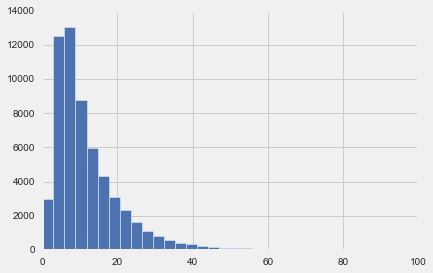

In [729]:
raw_df[raw_df.tokens <=200].tokens.hist(bins=50)
plt.xlim([0,100])

In [51]:
declarations = {}
declarations['Trump'] = '2015-06-16'
declarations['Clinton'] = '2015-04-11'


In [730]:
min_length = 10
max_length = 150
df = raw_df[raw_df.tokens >= min_length]
df = df[df.tokens <= max_length]
# post_dec = [date > dec for date,dec in zip(df.date, [declarations[candidate] for candidate in df.speaker])]
# df = df[post_dec]

In [731]:
df.speaker.value_counts()

Trump      15699
Clinton    11305
Name: speaker, dtype: int64

In [732]:
max(df.speaker.value_counts())/float(len(df))

0.58135831728632792

# Data In, configure Pipeline

In [751]:

all_features = [
      ('top_words', best_vectorizer(vectorizer, selector=SelectKBest(chi2, 2000), name='')),
#       ('sentiment_terms', sentiments(CountVectorizer(max_features=2000))),
#     ('quickstats', quick_stats()),
#     ('consec', best_vectorizer(repeats(), selector=SelectKBest(chi2, 20), name='')),
#     ('multiple', used_multiple(CountVectorizer())),
    ]
    
    

In [752]:
pipeline = Pipeline([
  ('features', FeatureUnion(all_features)),
    ('classifier', LogisticRegression())]
)

# Cross Validate

In [735]:
which_candidates = ['Clinton','Trump']

In [59]:
from sklearn.cross_validation import cross_val_score


In [736]:
condition = [speaker in which_candidates for speaker in df.speaker]
cand_df = df[condition]
kf = StratifiedKFold(y=cand_df.speaker, n_folds=5,random_state=42)
params = {'classifier__C': [.1,.3,1,3],
          'features__top_words__selector__k': [1000,2000,4000,'all'],
#           'features__top_words__vectorizer__binary': [True, False],
#           'features__top_words__selector__score_func': [chi2, f_classif],              
         }

grid = GridSearchCV(estimator=pipeline, param_grid = params, scoring = 'roc_auc',cv=kf, verbose=2)

grid.fit(cand_df.sentence,[1 if speaker == 'Trump' else 0 for speaker in cand_df.speaker])


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] features__top_words__selector__k=1000, classifier__C=0.1 ........
[CV]  features__top_words__selector__k=1000, classifier__C=0.1 -   8.2s
[CV] features__top_words__selector__k=1000, classifier__C=0.1 ........
[CV]  features__top_words__selector__k=1000, classifier__C=0.1 -   7.7s
[CV] features__top_words__selector__k=1000, classifier__C=0.1 ........
[CV]  features__top_words__selector__k=1000, classifier__C=0.1 -   8.6s
[CV] features__top_words__selector__k=1000, classifier__C=0.1 ........
[CV]  features__top_words__selector__k=1000, classifier__C=0.1 -   8.8s
[CV] features__top_words__selector__k=1000, classifier__C=0.1 ........
[CV]  features__top_words__selector__k=1000, classifier__C=0.1 -   8.5s
[CV] features__top_words__selector__k=2000, classifier__C=0.1 ........
[CV]  features__top_words__selector__k=2000, classifier__C=0.1 -  10.4s
[CV] features__top_words__selector__k=2000, classifier__C=0.1 ........
[CV]  feat

[Parallel(n_jobs=1)]: Done  40 tasks       | elapsed:  6.4min


[CV] . features__top_words__selector__k=1000, classifier__C=1 -   8.3s
[CV] features__top_words__selector__k=1000, classifier__C=1 ..........
[CV] . features__top_words__selector__k=1000, classifier__C=1 -   8.5s
[CV] features__top_words__selector__k=1000, classifier__C=1 ..........
[CV] . features__top_words__selector__k=1000, classifier__C=1 -   8.3s
[CV] features__top_words__selector__k=1000, classifier__C=1 ..........
[CV] . features__top_words__selector__k=1000, classifier__C=1 -   8.2s
[CV] features__top_words__selector__k=1000, classifier__C=1 ..........
[CV] . features__top_words__selector__k=1000, classifier__C=1 -   9.0s
[CV] features__top_words__selector__k=2000, classifier__C=1 ..........
[CV] . features__top_words__selector__k=2000, classifier__C=1 -   8.8s
[CV] features__top_words__selector__k=2000, classifier__C=1 ..........
[CV] . features__top_words__selector__k=2000, classifier__C=1 -   8.5s
[CV] features__top_words__selector__k=2000, classifier__C=1 ..........
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 12.4min finished


GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=['Trump' 'Trump' ..., 'Clinton' 'Clinton'], n_folds=5, shuffle=False, random_state=42),
       error_score='raise',
       estimator=Pipeline(steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('top_words', best_vectorizer(name='',
        selector=SelectKBest(k=2000, score_func=<function chi2 at 0x114841e60>),
        vectorizer=CountVectorizer(analyzer=u'word', binary=True, decode_error='ignore',
        dtype=<type 'nu...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'features__top_words__selector__k': [1000, 2000, 4000, 'all'], 'classifier__C': [0.1, 0.3, 1, 3]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=2)

In [737]:
grid.grid_scores_

[mean: 0.87728, std: 0.03476, params: {'features__top_words__selector__k': 1000, 'classifier__C': 0.1},
 mean: 0.88967, std: 0.03482, params: {'features__top_words__selector__k': 2000, 'classifier__C': 0.1},
 mean: 0.90122, std: 0.03454, params: {'features__top_words__selector__k': 4000, 'classifier__C': 0.1},
 mean: 0.91416, std: 0.03210, params: {'features__top_words__selector__k': 'all', 'classifier__C': 0.1},
 mean: 0.88225, std: 0.03317, params: {'features__top_words__selector__k': 1000, 'classifier__C': 0.3},
 mean: 0.89528, std: 0.03284, params: {'features__top_words__selector__k': 2000, 'classifier__C': 0.3},
 mean: 0.90745, std: 0.03283, params: {'features__top_words__selector__k': 4000, 'classifier__C': 0.3},
 mean: 0.91876, std: 0.02924, params: {'features__top_words__selector__k': 'all', 'classifier__C': 0.3},
 mean: 0.88339, std: 0.03200, params: {'features__top_words__selector__k': 1000, 'classifier__C': 1},
 mean: 0.89629, std: 0.03122, params: {'features__top_words__sel

In [738]:
scores = grid.grid_scores_
grid.best_params_

{'classifier__C': 0.3, 'features__top_words__selector__k': 'all'}

In [739]:
cv = []
scores = grid.grid_scores_
for combo in scores:
    pars = combo[0]
    pars['mean'] = combo[1]
    cv.append(pars)
pd.DataFrame(cv).sort_values(by='mean',ascending=False)

,classifier__C,features__top_words__selector__k,mean
7,0.3,all,0.918762
11,1.0,all,0.917164
3,0.1,all,0.914163
15,3.0,all,0.912571
10,1.0,4000,0.908309
6,0.3,4000,0.907453
14,3.0,4000,0.905254
2,0.1,4000,0.901219
9,1.0,2000,0.896293
5,0.3,2000,0.895283


## Build a cross-val-predict-proba

In [68]:
pipeline=grid.best_estimator_

In [753]:
import time

cand_df = df[[speaker in which_candidates for speaker in df.speaker]]

n_folds = 50

segment_results = pd.DataFrame()
all_results = pd.DataFrame()
segment_coefs = [pd.DataFrame()]*n_folds

kf = StratifiedKFold(y=cand_df.speaker, n_folds =n_folds,random_state=42)

for i, (train_index, test_index) in enumerate(kf):
    t0 = time.time()
    pipeline.fit(cand_df.iloc[train_index].sentence, cand_df.iloc[train_index].speaker)
#     print 'done fitting',i,"time:",time.time()-t0
    segment_coefs[i] = pipeline_coef_df(pipeline)
    segment_results = pd.DataFrame(
                                    pipeline.predict_proba(cand_df.iloc[test_index].sentence),
                                    index=list(cand_df.iloc[test_index].index),
                                    columns=pipeline.named_steps['classifier'].classes_)
    print 'done predicting',i,"time:",time.time()-t0

    all_results=all_results.append(segment_results)
        
    

done predicting 0 time: 10.6087088585
done predicting 1 time: 10.0399470329
done predicting 2 time: 9.37932109833
done predicting 3 time: 9.65105581284
done predicting 4 time: 9.64090895653
done predicting 5 time: 9.78888702393
done predicting 6 time: 9.49414491653
done predicting 7 time: 9.62601804733
done predicting 8 time: 9.59486699104
done predicting 9 time: 10.9973599911
done predicting 10 time: 11.0214221478
done predicting 11 time: 10.3796999454
done predicting 12 time: 10.5761210918
done predicting 13 time: 10.6775100231
done predicting 14 time: 9.88932800293
done predicting 15 time: 9.75862312317
done predicting 16 time: 10.7234799862
done predicting 17 time: 11.197756052
done predicting 18 time: 10.6995239258
done predicting 19 time: 10.1120948792
done predicting 20 time: 10.008341074
done predicting 21 time: 9.97609806061
done predicting 22 time: 9.85305714607
done predicting 23 time: 10.5911200047
done predicting 24 time: 12.7173018456
done predicting 25 time: 11.736118078

In [754]:
cv_result = cand_df.copy().join(all_results)

In [755]:
cv_result.groupby('speaker').mean()

,speech_idx,tokens,Clinton,Trump
speaker,,,,
Clinton,141.634498,20.579655,0.721259,0.278741
Trump,48.424231,17.535257,0.198554,0.801446


In [756]:
cv_result['predict'] = cv_result.apply(lambda x: x[which_candidates].argmax(), axis = 1)

In [757]:
cv_result['correct'] = cv_result.predict == cv_result.speaker

In [758]:
cv_result.correct.value_counts()

True     22465
False     4539
Name: correct, dtype: int64

In [759]:
cv_result.correct.value_counts()[1]/float(len(cv_result.correct))

0.83191379054954817

0.910731395659


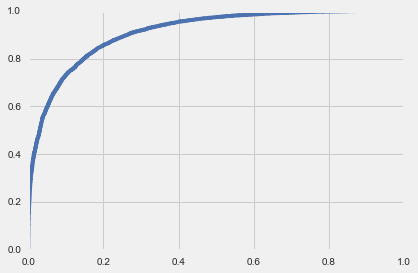

In [760]:
#  sklearn.metrics.roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate
correct= [1 if speaker == 'Trump' else 0 for speaker in cv_result.speaker]
roc = roc_curve(correct, y_score=list(cv_result.Trump))
print roc_auc_score(correct, cv_result.Trump)
plt.plot(roc[0], roc[1])

In [686]:
sns.set_palette('deep')

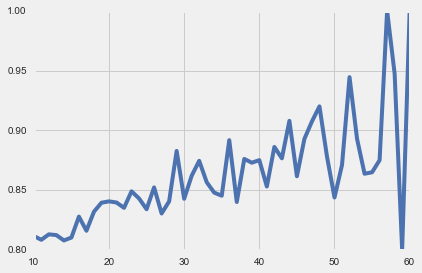

In [687]:
plt.plot(cv_result[(cv_result.tokens <=60)&(cv_result.tokens >=2)].groupby('tokens').mean()['correct'])

In [688]:
cv_result.head()

,date,sentence,speaker,speech_idx,title,token_list,tokens,Clinton,Trump,predict,correct
10,2016-09-03,i just wrote this the other day knowing that i...,Trump,1,Presidential Candidate Donald Trump Remarks in...,"[i, just, wrote, this, the, other, day, knowin...",42,0.533367,0.466633,Clinton,False
11,2016-09-03,"for centuries, the african american church has...",Trump,1,Presidential Candidate Donald Trump Remarks in...,"[for, centuries, the, african, american, churc...",15,0.333398,0.666602,Trump,True
12,2016-09-03,it is from the pews and pulpits and christian ...,Trump,1,Presidential Candidate Donald Trump Remarks in...,"[it, is, from, the, pews, and, pulpits, and, c...",58,0.997086,0.002914,Clinton,False
13,2016-09-03,and we are bound together and i see that today.,Trump,1,Presidential Candidate Donald Trump Remarks in...,"[and, we, are, bound, together, and, i, see, t...",10,0.530963,0.469037,Clinton,False
15,2016-09-03,the african-american fate immunity has been on...,Trump,1,Presidential Candidate Donald Trump Remarks in...,"[the, african, american, fate, immunity, has, ...",19,0.233210,0.766790,Trump,True


In [761]:

for candidate in which_candidates:
    print "Most",candidate,":"
    for idx, row in cv_result[cv_result.speaker == cv_result.predict].sort_values(by=candidate,ascending=False).iloc[0:10].iterrows():
        sent = row.sentence
        print "\t",sent[0].upper()+sent[1:]
        print "--",row.speech_idx, row.title
        print long_df.loc[row.speech_idx].link
        print "Predicted Clinton: ",row.Clinton
        print "Predicted Trump: ",row.Trump
        print
    print
    print
    

Most Clinton :
	I hope you will join me and that you will be part of this effort to build on the progress we have made under president obama to go further and to make it absolutely clear that we are fighting to break down barriers wherever they may be because we know america deserves nothing less and americans deserve to have the future that we will create together.
-- 138 Presidential Candidate Hillary Clinton Rally in Orangeburg, South Carolina
http://www.c-span.org/video/?405395-1/hillary-clinton-campaign-rally-orangeburg-south-carolina
Predicted Clinton:  0.999999999971
Predicted Trump:  2.85589102774e-11

	Think of what we are losing because we are not doing everything we can to reach out to those families and we know again from so much research year in the united states and around the world that mentoring and intervention will help those often stressed out young moms understand more about what they can do and to avoid the difficulties that stand in the way of their being able to 

In [773]:
cv_result.to_csv('cv_result_sept_3.csv')

In [641]:

for candidate in which_candidates:
    print "Most",candidate+"-like, but not:"
    for idx, row in cv_result[cv_result.speaker != cv_result.predict].sort_values(by=candidate,ascending=False).iloc[0:10].iterrows():
        sent = row.sentence
        print "\t",sent[0].upper()+sent[1:]
        print "--",row.speech_idx, row.title
        print long_df.loc[row.speech_idx].link
        print "Predicted Clinton: ",row.Clinton
        print "Predicted Trump: ",row.Trump
        print
    print
    print

Most Clinton-like, but not:
	This is why we have already  passed legislation to support  wounded warriors, veterans who  struggle with mental health challenges and earlier this week to support female veterans in  particular who need our help.
-- 22 Faith and Freedom Coalition Conference
http://www.c-span.org/video/?410912-1/faith-freedom-coalition-holds-annual-conference
Predicted Clinton:  0.99982204019
Predicted Trump:  0.000177959810106

	This will ensure that our own workers, right here in america, get the jobs and higher pay that will grow our tax revenues, increase our economic might as a nation, make us strong financially again.
-- 33 Presidential Candidate Donald Trump Remarks on Foreign Policy
http://www.c-span.org/video/?408693-1/donald-trump-speech-foreign-policy
Predicted Clinton:  0.999611912257
Predicted Trump:  0.000388087743038

	I say it is my high honor and distinct privilege for the sake of our troops who deserve a commander-in-chief who will have their back, for the

In [763]:
sums = {}
for candidate in which_candidates:
    sums[candidate] = pd.DataFrame(index=segment_coefs[0].index)
t0 = time.time()
for i, segment in enumerate(segment_coefs):
    segment.drop_duplicates(inplace=True)
    for candidate in which_candidates:
        sums[candidate] = sums[candidate].join(segment[candidate], rsuffix=str(i))
        sums[candidate].drop_duplicates(inplace=True)


In [764]:
average_coef = pd.DataFrame()

for candidate in which_candidates:
    sums[candidate].fillna(1.0, inplace=True) # odds ratio
    #     average_coef[candidate] = sums[candidate].apply(lambda x: len(x) / sum([1./i for i in x]), axis=1)
    logged = np.log(sums[candidate])
    average_coef[candidate] = np.e**(logged.sum(axis=1) /  logged.shape[1])

In [766]:
print average_coef.sort_values(by='Trump', ascending=False).head(50)['Trump']
print
print average_coef.sort_values(by='Clinton', ascending=False).head(50)['Clinton']

tremendous       12.452513
islamic           9.698527
guy               9.297976
hispanics         7.911610
allowed           7.214685
conservative      7.178784
my wife           6.962965
poll              6.881809
frankly           6.642702
golf              6.520700
establishment     6.351741
badly             6.288557
politician        6.284664
highly            6.198536
japan             6.117073
incredible        6.085105
believe me        6.059045
ivanka            5.977478
deals             5.772990
almost            5.769029
guys              5.688395
an example        5.653908
indiana           5.640810
politicians       5.582151
hillary           5.574887
stupid            5.564198
rigged            5.538057
nice              5.418099
be very           5.302870
delegates         5.258262
common core       5.175335
by the way        5.150270
media             5.091336
television        4.944412
come in           4.924884
correct           4.855085
fox               4.835687
i

In [767]:
average_coef.to_csv('average_coef_sept_3.csv')

In [776]:
average_coef.loc['money']

Clinton    0.472218
Trump      2.117665
Name: money, dtype: float64

In [358]:
import re

In [419]:
def ngrams(sentence):
    tokens = []
#     for i in range(low, high+1):
    tokens = tokens + re.findall('(?=(\\b\\w+\\b))', sentence)
    tokens = tokens + [' '.join(bigram) for bigram in re.findall('(?=(\\b\\w+\\b)(?: ?)(\\b\\w+\\b))', sentence)]
    tokens = tokens + [' '.join(trigram) for trigram in re.findall('(?=(\\b\\w+\\b)(?: ?)(\\b\\w+\\b)(?: ?)(\\b\\w+\\b))', sentence)]
    return tokens
        
# result = [(g.start(), g.group()) for g in re.compile('A').finditer(string)]
# result += [(g.start(), g.group()) for g in re.compile('AB').finditer(string)]

In [420]:
ngrams('Hello there I am dog.')

['Hello',
 'there',
 'I',
 'am',
 'dog',
 'Hello there',
 'there I',
 'I am',
 'am dog',
 'Hello there I',
 'there I am',
 'I am dog']

In [726]:
check = 'politician'
vec2 = CountVectorizer(vocabulary=average_coef.index.values, binary=False, 
                                              analyzer=ngrams,
                      ).fit([])
term_vec = {}
inc_vec = {}
importance = {}
for candidate in which_candidates:
    term_vec[candidate] = pd.DataFrame(vec2.transform(cv_result[cv_result.speaker==candidate].sentence).todense(), columns=vec2.get_feature_names())
    inc_vec[candidate] = term_vec[candidate][odds_vec[candidate][check]>=1]
    importance[candidate] = average_coef[candidate] ** inc_vec[candidate].sum()
    

/Users/jessegalef/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [727]:
for term in importance['Clinton'].sort_values(ascending=False)[:20].keys():
    print term, ' '*(20-len(term)),average_coef.ix[term, 'Clinton'],'\t',inc_vec['Clinton'][term].sum(), '\t', inc_vec['Trump'][term].sum()
    


of americans          3.84445348128 	1 	0
college               3.49693872946 	1 	0
americans             2.90688532248 	1 	0
to                    1.4004997806 	2 	18
make sure             1.94411923903 	1 	0
make sure that        1.87995071778 	1 	0
make                  1.76458635241 	1 	1
can be                1.47921233295 	1 	0
millions of americans  1.38014354518 	1 	0
we need               1.37190261116 	1 	1
need                  1.36594964593 	1 	1
we need to            1.32790866011 	1 	0
and we need           1.28993897953 	1 	0
us                    1.22255840072 	1 	0
of                    1.0961765963 	2 	9
need to               1.19167774413 	1 	0
that                  1.1859107983 	1 	7
can                   1.1379535441 	1 	1
sure                  1.13129250443 	1 	0
for                   1.10280616189 	1 	3


In [548]:
odds_vec['Trump']['believe me'].value_counts()

0    18901
1       81
2        3
Name: believe me, dtype: int64

In [549]:
joined_text['Trump'] = '\n'.join(cv_result.sentence[cv_result.speaker=='Trump'])
joined_text['Clinton'] = '\n'.join(cv_result.sentence[cv_result.speaker=='Clinton'])

In [550]:
joined_text['Trump'].count('believe me')+joined_text['Clinton'].count('believe me')

88

In [553]:
sums = inc_vec['Clinton'].sum()

In [556]:
mult = pd.Series([coef**s for coef,s in zip(average_coef['Clinton'], sums)], index=average_coef.index)

In [559]:
mult.sort_values(ascending=False)[:10]

to            3.533309e+47
america       3.305646e+18
believe       2.353011e+16
believe we    3.187823e+15
that          4.725710e+13
what          2.175239e+10
believe in    3.871689e+09
economy       1.963201e+08
we can        6.253398e+07
together      9.917740e+06
dtype: float64

In [338]:
cv_result.sentence.iloc[10]

u'and everywhere else because they are gone i will have a chance to discuss on how to put every american on the latter for success for grade education and great jobs.'

In [263]:
average_coef.loc['civil']

Clinton    1.586503
Trump      0.630317
Name: civil, dtype: float64

In [481]:
sums = inc_vec.sum()

In [243]:
powers = [coef**sum ]

271.44899961544172

In [225]:
sums.sum().sort_values(ascending=False)[0:10]

the        289.443491
believe    271.449000
and        252.292869
we         211.639503
that       177.832193
to         165.841530
in         147.546046
it         140.449527
of         131.941426
they       129.853655
dtype: float64

In [229]:
t = average_coef.loc['the']['Trump']

In [241]:
average_coef.loc['believe me']

Clinton    0.149527
Trump      6.687769
Name: believe me, dtype: float64

In [234]:
t**30

312.59108698112988

In [178]:
cross = inc_vec.dot(average_coef)

In [186]:
print inc_vec.shape
print average_coef.T.shape

(461, 2400)
(2, 2400)


In [768]:
pronoun_coefs = average_coef.loc[[col for col in average_coef.index if col in pronouns]].sort_values('Trump', ascending=False)
# toplot = pronoun_coefs[((pronoun_coefs.Trump >= 1) | (pronoun_coefs.Clinton >=1))].copy()
toplot = pronoun_coefs.iloc[0:10].append(pronoun_coefs.iloc[-10:])


In [769]:

def color_map(percent, top, bottom):
    if percent >1:
        percent = 1
    diff = [t-b for t,b in zip(top, bottom)]
    
    return [(d*percent)+b for d,b in zip(diff, bottom)]
    

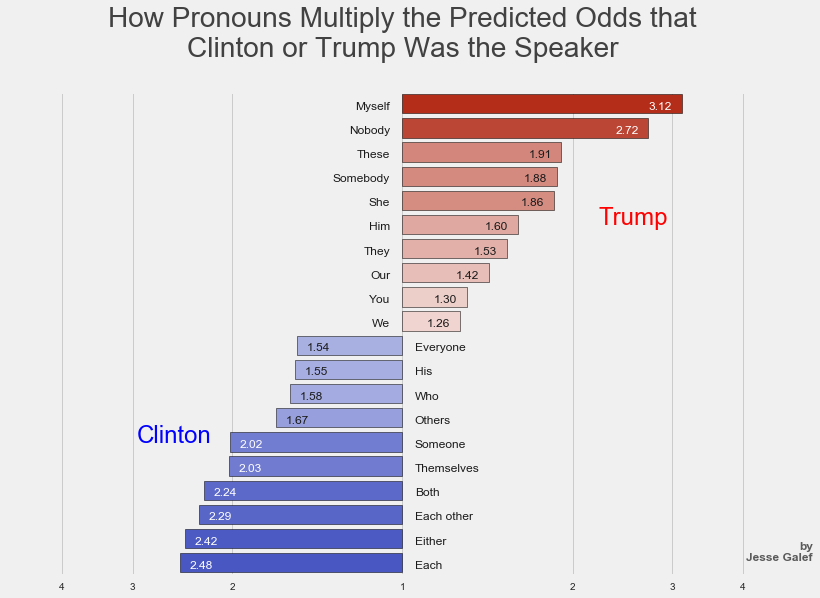

In [770]:

f, (ax1) = plt.subplots(1,1, figsize=(12,9))
label_size = 12
value_size = 9

vals = [np.log(x) for x in toplot.sort_values('Trump', ascending=False).Trump]

#minimum=abs(min(vals))
maximum=max(vals)
minimum=maximum
blue=[0,.1,.8]
red = [.8,.1,0]
white = [1,1,1]
colors = [color_map(-value/minimum, blue, white) if value < 0 else color_map(value/maximum, red, white) for value in vals]


sns.barplot(x=vals,
            y=toplot.sort_values('Trump', ascending=False).index, ax=ax1,
            palette=colors, 
#             color=colors,
            edgecolor='black')

ax1.set_title("How Pronouns Multiply the Predicted Odds that\nClinton or Trump Was the Speaker\n", fontsize=28, color=[.25,.25,.25])

# ax1.set_yticklabels([x[0].upper()+x[1:] for x in toplot.sort_values('Trump', ascending=False).index.values], fontsize=16)


labels = [x[0].upper()+x[1:] for x in toplot.sort_values('Trump', ascending=False).index.values]
for i, patch in enumerate(ax1.patches):
    width = patch.get_width()
    
    if patch.get_x() < 0:
        # Bars extending on the left
        label_x = .05
        label_halign = 'left'
        if patch.get_width() >= np.log(1.15):     
            value_x = patch.get_x()+.04
            value_halign = 'left'
        else:
            value_x = patch.get_x()-.04
            value_halign='right'
    else:
        # Bars extending on the right
        label_x = -.05
        label_halign = 'right'
        if patch.get_width() >= np.log(1.15):
            value_x = patch.get_width()-.04
            value_halign = 'right'
        else:
            value_x = patch.get_width() + .04
            value_halign = 'left'

    value_color = [.1,.1,.1]
    if patch.get_width()> np.log(2): value_color = 'white'
    ax1.text(label_x, patch.get_y()+.61, '%s'%(labels[i]), color=[.1,.1,.1], ha=label_halign, fontsize=label_size)   
    ax1.text(value_x, patch.get_y()+.61, '%1.2f'%(np.e**abs(vals[i])), color=value_color, ha=value_halign, fontsize=label_size)    

            
ax1.text(-np.log(2.95), 14, 'Clinton', color='b', fontsize=24)
ax1.text(np.log(2.95), 5, 'Trump', color='r', fontsize=24, ha='right')

ax1.set_yticklabels([])
ax1.set_xlabel('')
ax1.set_xlim([-np.log(5),np.log(5)])

ax1.set_xticks([-np.log(4),-np.log(3),-np.log(2),0,np.log(2),np.log(3), np.log(4)], minor=False)
ax1.set_xticklabels([4,3,2,1,2,3,4], minor=False)

f.text(.95, .07, 'by\nJesse Galef', color=[.2,.2,.2], fontsize=12, alpha=.8, ha='right', weight='bold', variant='small-caps')


plt.plot()
f.tight_layout(rect=[0,0,.95,.95])

In [771]:
print toplot.sort_values('Trump')['Clinton'][:15]
print toplot.sort_values('Clinton')['Trump'][:15]


each          2.478755
either        2.423942
each other    2.290494
both          2.244548
themselves    2.025851
someone       2.019864
others        1.672497
who           1.578782
his           1.547923
everyone      1.535259
we            0.791244
you           0.770145
our           0.702353
they          0.654019
him           0.625112
Name: Clinton, dtype: float64
myself      3.117861
nobody      2.721061
these       1.910636
somebody    1.877970
she         1.855257
him         1.599714
they        1.529007
our         1.423785
you         1.298457
we          1.263833
everyone    0.651356
his         0.646027
who         0.633400
others      0.597908
someone     0.495083
Name: Trump, dtype: float64


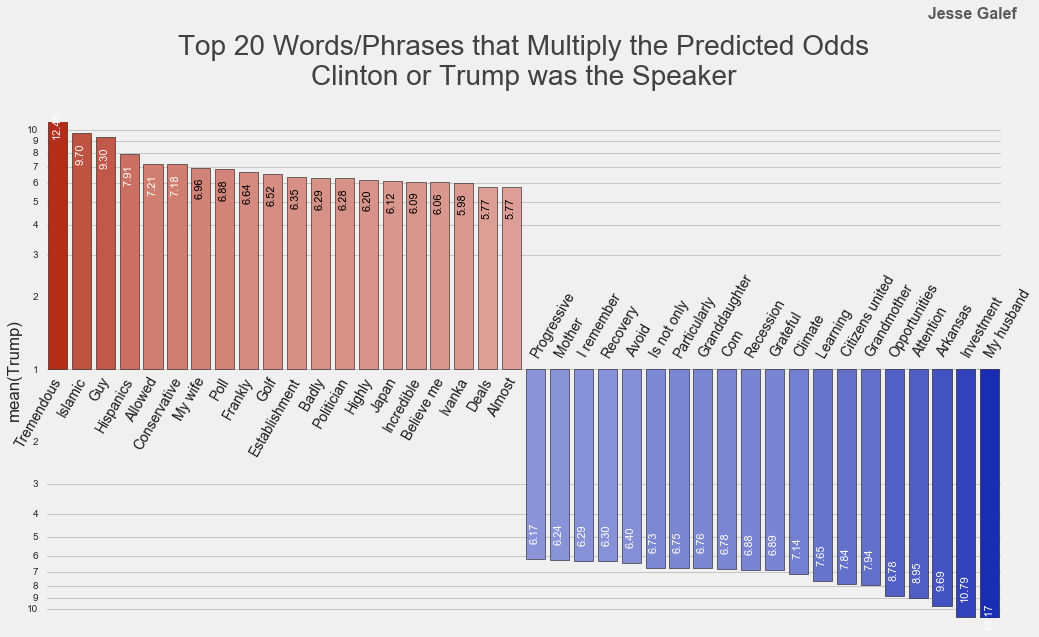

In [772]:
#  seaborn.barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, 
#  estimator=<function mean>, ci=95, n_boot=1000, units=None, orient=None, color=None,
#  palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, ax=None, **kwargs)¶
f, ax1 = plt.subplots(1,1, figsize=(15,9))

ax1.set_yticks([-1*np.log(x) for x in range(10,1,-1)]+[0]+[np.log(y) for y in range(2,11)])
    
ax1.set_yticklabels(range(10,1,-1)+['1']+range(2,11))


ax1.set_ylabel('')

label_font_size = 14
value_font_size=11
rotate =60
n_words = 20

color_adjustment = np.log(3)
val_series = average_coef.sort_values('Trump', ascending=False)['Trump']
vals = val_series[:n_words].append(val_series[-n_words:])
vals = np.log(vals)

# minimum=abs(min(vals))
maximum=max(vals)
minimum=maximum
blue=[0,.1,.8]
red = [.8,.1,0]
white = [1,1,1]

colors = [color_map(-(value+color_adjustment)/(minimum-color_adjustment), blue, white) if value < 0 else color_map((value-color_adjustment)/(maximum-color_adjustment), red, white) for value in vals]

sns.barplot(y=vals,
            x=vals.index, ax=ax1,
            palette=colors, 
#             color=colors,
            edgecolor='black')

ax1.set_xticks([])
ax1.set_xlabel('')
ax1.set_title("Top "+str(n_words)+" Words/Phrases that Multiply the Predicted Odds\nClinton or Trump was the Speaker\n", fontsize=28, color=[.25,.25,.25])


labels = [x[0].upper()+x[1:] for x in vals.sort_values(ascending=False).index.values]

for i, patch in enumerate(ax1.patches):
    height = patch.get_height()
    if patch.get_y() < 0:
#         y = patch.get_y() -.5
        if height > np.log(6): 
            color = 'white'
        else:
            color = 'black'

        ax1.text(patch.get_x()+.1, .1, '%s'%(labels[i]), color=[.1,.1,.1], va='bottom', ha='left', rotation=rotate, fontsize=label_font_size)
        ax1.text(patch.get_x()+.15, patch.get_y()+.15, '%1.2f'%(np.e**abs(vals[i])), color=color, rotation=90, va='bottom', fontsize=value_font_size)
    else:
        if height > np.log(7): 
            color = 'white'
        else:
            color = 'black'
        ax1.text(patch.get_x()+.7, -.05, '%s'%(labels[i]), color=[.1,.1,.1], ha='right', va='top', rotation=rotate, fontsize=label_font_size)
        ax1.text(patch.get_x()+.15, patch.get_y()+height-.3, '%1.2f'%(np.e**abs(vals[i])), color=color, rotation = 90, va='bottom', fontsize=value_font_size)

            
f.text(.95, .95, 'Jesse Galef', color=[.2,.2,.2], fontsize=16, alpha=.8, ha='right', weight='bold', variant='small-caps')

ax1.set_ylim([-np.log(11), np.log(11)])

# ax1.yaxis.tick_right()
# ax1.yaxis.set_ticks_position('both')

for i, ygrid in enumerate(ax1.get_ygridlines()):
#     print ygrid.get_ydata(orig=False)[0], np.log(2)
#     if abs(ygrid.get_ydata(orig=True)[0]) == np.log(2):
    if i==8 or i==10:
        ygrid.set_xdata([0,0])

plt.grid(which='major', color=[.7,.7,.7], alpha=.7)
plt.margins(.3)
plt.plot()
f.tight_layout(rect=[0,0,.95,.95])



In [138]:
def convert(x):
    if x>1:
        return "Trump: %1.1f"%(x)
    else:
        return "Clinton: %1.1f"%(1/x)

In [139]:
terms['multiplier'] = terms.Trump.apply(convert)

In [146]:
def color2(x):
    blue=[0,.1,.8]
    red = [.8,.1,0]
    white = [1,1,1]
    if x <1:
        dec = color_map((1/x)/10, blue, white)
    else:
        dec = color_map((x+5)/15, red, white)
#     print dec
    return '#%02x%02x%02x' %(dec[0]*256,dec[1]*256,dec[2]*256)

In [147]:
terms['color'] = terms.Trump.apply(color2)

In [148]:
"<tr><td> term </td><td><span style='fontcolor: color'> multiplier </span></td></tr>"

"<tr><td> term </td><td><span style='fontcolor: color'> multiplier </span></td></tr>"

In [214]:
print "<table>"
print "<th></th><th>Top 20 Trump Words</th><th>Multiplier</th><th>Top 20 Clinton Words</th><th>Multiplier</th>"
for i in range(20):
    print "<tr>"
    print "<td><strong>"+str(i+1)+": </strong></td>"
    print "<td>"+terms.index[i]+"</td><td><strong style='color:"+str(terms.iloc[i].color)+"'>"+str(terms.iloc[i].multiplier)+"</strong></td>"
    print "<td>"+terms.index[-(i+1)]+"</td><td><strong style='color:"+str(terms.iloc[-(i+1)].color)+"'>"+str(terms.iloc[-(i+1)].multiplier)+"</strong></td>"
    print "</tr>"
print "</table>"

<table>
<th></th><th>Top 20 Trump Words</th><th>Multiplier</th><th>Top 20 Clinton Words</th><th>Multiplier</th>
<tr>
<td><strong>1: </strong></td>
<td>tremendous</td><td><strong style='color:#d02a12'>Trump: 8.9</strong></td>
<td>attention</td><td><strong style='color:#061fce'>Clinton: 9.8</strong></td>
</tr>
<tr>
<td><strong>2: </strong></td>
<td>guy</td><td><strong style='color:#d53e29'>Trump: 7.6</strong></td>
<td>investment</td><td><strong style='color:#2f44d6'>Clinton: 8.1</strong></td>
</tr>
<tr>
<td><strong>3: </strong></td>
<td>allowed</td><td><strong style='color:#d5402b'>Trump: 7.5</strong></td>
<td>opportunities</td><td><strong style='color:#3448d7'>Clinton: 7.9</strong></td>
</tr>
<tr>
<td><strong>4: </strong></td>
<td>totally</td><td><strong style='color:#d64632'>Trump: 7.1</strong></td>
<td>my husband</td><td><strong style='color:#3e52d9'>Clinton: 7.5</strong></td>
</tr>
<tr>
<td><strong>5: </strong></td>
<td>believe me</td><td><strong style='color:#d74b37'>Trump: 6.7</str

In [475]:
joined_text = {}
for candidate in which_candidates:
    joined_text[candidate] = ' '.join(cv_result[cv_result.speaker==candidate].sentence)


In [478]:
for term in ['believe', 'believe me', 'huge']:
    print term,
    for candidate in which_candidates:
        print candidate," ", joined_text[candidate].count(term),
    print
    print average_coef.loc[term]
    print

believe Clinton   289 Trump   205
Clinton    1.536200
Trump      0.650957
Name: believe, dtype: float64

believe me Clinton   1 Trump   52
Clinton    0.149527
Trump      6.687769
Name: believe me, dtype: float64

huge Clinton   16 Trump   12


KeyError: 'the label [huge] is not in the [index]'

In [474]:
' '.join(cv_result[cv_result.speaker=='Trump'].sentence).count('believe me')


52

In [151]:
%%time
average_coef.to_csv('average_coef.csv', encoding='utf-8')

CPU times: user 63.4 ms, sys: 62.1 ms, total: 125 ms
Wall time: 272 ms


In [152]:
cv_result.to_csv('cv_result.csv')